In [986]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from scipy.stats import norm

In [409]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('Resources/movies.csv', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [410]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("Resources/ratings.csv", engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [411]:
#Data acquisition of the users dataset
df_user = pd.read_csv("Resources/users.csv", engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [412]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


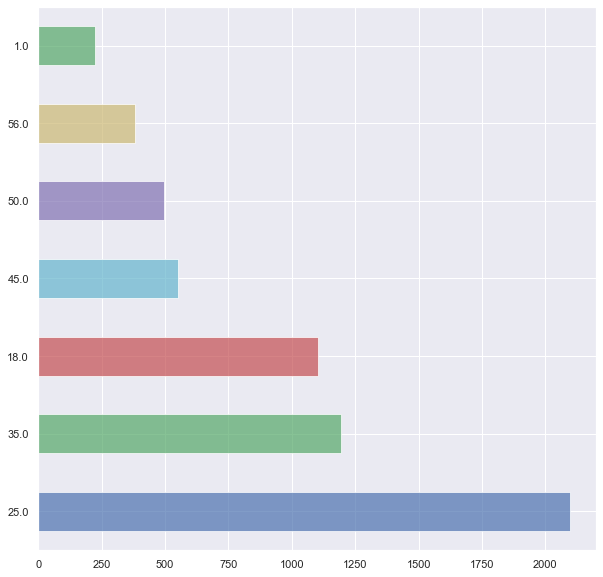

In [413]:
#Visualize user age distribution
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10),color = colors)
plt.show()

Text(0.5, 0, 'Age')

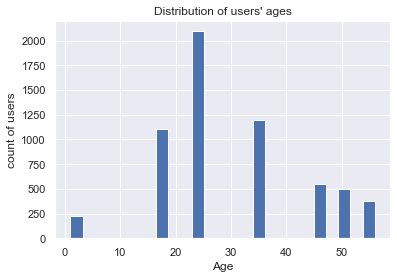

In [414]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [418]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1.0,0-9
1,56.0,50-59
2,25.0,20-29
3,45.0,40-49
5,50.0,50-59
6,35.0,30-39
17,18.0,10-19
6040,NaN,NaN


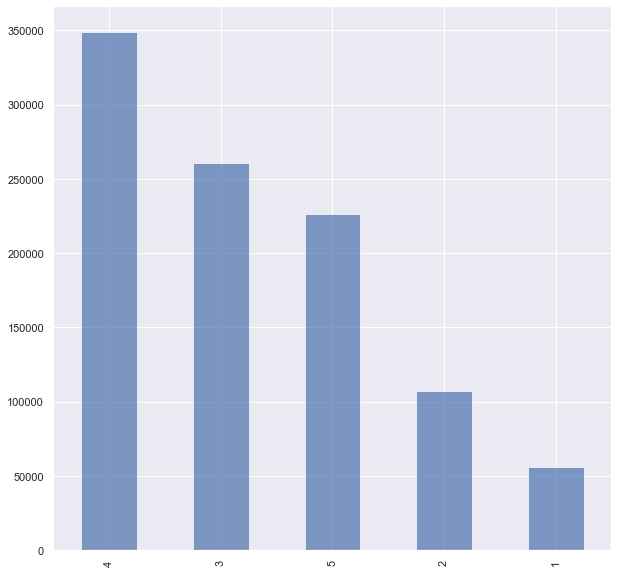

In [420]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [421]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [422]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                      1
Only You (1994)                             1
Open Season (1996)                          1
Open Your Eyes (Abre los ojos) (1997)       1
Operation Condor (Feiying gaiwak) (1990)    1
                                           ..
Toy Story (1995)                            1
Toy Story 2 (1999)                          1
Toys (1992)                                 1
Total Recall (1990)                         1
Trading Places (1983)                       1
Length: 1000, dtype: int64


In [423]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

In [130]:
ToyStory_data

,Id,Title (year),Genre,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-Code,age_group
3045,3114.0,Toy Story 2 (1999),Animation|Children's|Comedy,23,457,3,978465744,3046.0,M,1.0,4.0,46311,0-9


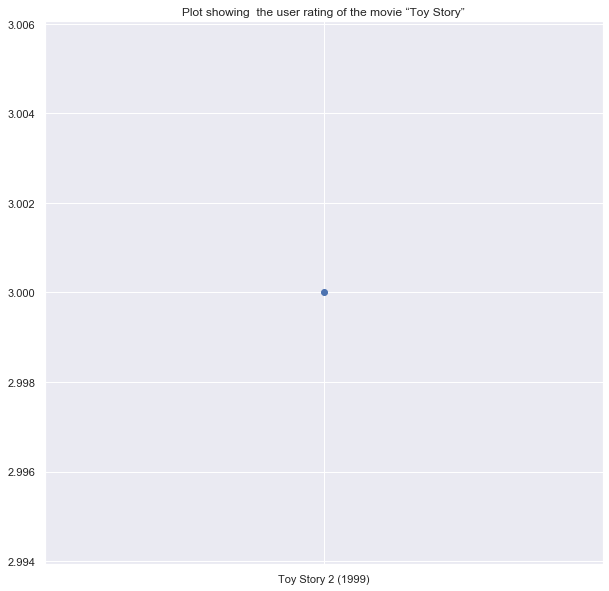

In [424]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [425]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3045,Toy Story 2 (1999),0-9


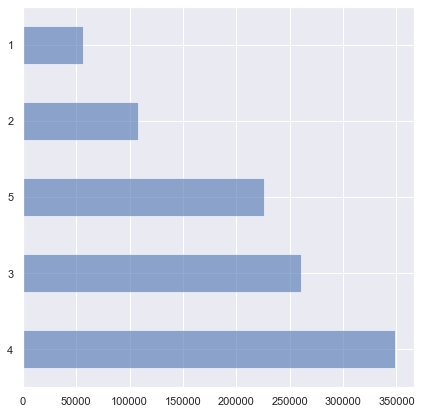

In [426]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [427]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2695,2696.0,3


In [428]:
#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

/Users/ehsan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [429]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values
features

array([[2.660e+02, 2.500e+01, 2.000e+00],
       [1.700e+01, 3.500e+01, 6.000e+00],
       [3.699e+03, 3.500e+01, 1.100e+01],
       ...,
       [2.174e+03, 1.800e+01, 2.000e+00],
       [9.120e+02, 5.600e+01, 1.400e+01],
       [2.248e+03, 5.000e+01, 1.600e+01]])

In [430]:
#Use rating as label
labels = first_500[['Ratings']].values

In [431]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)
train

array([[2.643e+03, 5.000e+01, 1.000e+00],
       [6.480e+02, 2.500e+01, 3.000e+00],
       [3.480e+02, 2.500e+01, 7.000e+00],
       ...,
       [3.471e+03, 1.800e+01, 1.700e+01],
       [2.987e+03, 2.500e+01, 0.000e+00],
       [2.447e+03, 3.500e+01, 7.000e+00]])

In [156]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

/Users/ehsan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


98.32

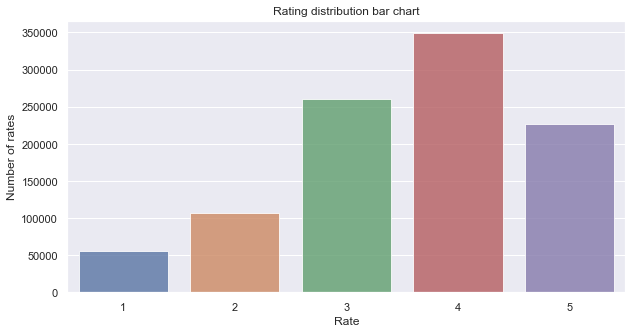

In [4]:
# get rate value counts
rate_count  = ratings_df['Rating'].value_counts()
plt.figure(figsize=(10,5))
# plot barchart for Rating column
sns.barplot(rate_count.index, rate_count.values, alpha=0.8)
plt.title('Rating distribution bar chart')
# set labels
plt.ylabel('Number of rates', fontsize=12)
plt.xlabel('Rate', fontsize=12)
plt.show()
# alternative way ===> ax=sns.countplot(x='Rating', data=ratings_df)

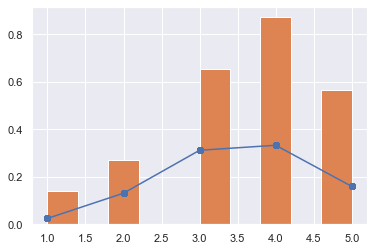

In [5]:
# sorted
h = sorted(ratings_df['Rating'])
# this is a fitting indeed
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
# use this to draw histogram of your data
plt.hist(h,density=True)
plt.show()

# PCA Detection
Detecting shilling attacks improves security of a recommender system [7]. PCA detection is proposed to detect shilling profiles in a recommender system [9, 15, 14]. PCA is a linear dimensionality reduction method and aims to project original data onto a new space with lower dimensionality and small covariances between any dimensions. A dimension with high covariance with others are regarded as redundant information and are discarded. As a result, redundancy of data is reduced by projecting original data to a new space [24].
Based on the concept that shilling profiles have high covariance with other user profiles, PCA is applied to detect shilling profiles. PCA regards users as dimensions of a user-item ma- trix. Thus, a profile with small linear combination weight is more likely to be a shilling profile. A number of profiles with smallest linear combination weight will be identified as shilling profiles. PCA detection performs well to detect shilling profiles constructed by several usual attack models, such as random at- tack, average attack, and bandwagon attack [9].

<div>
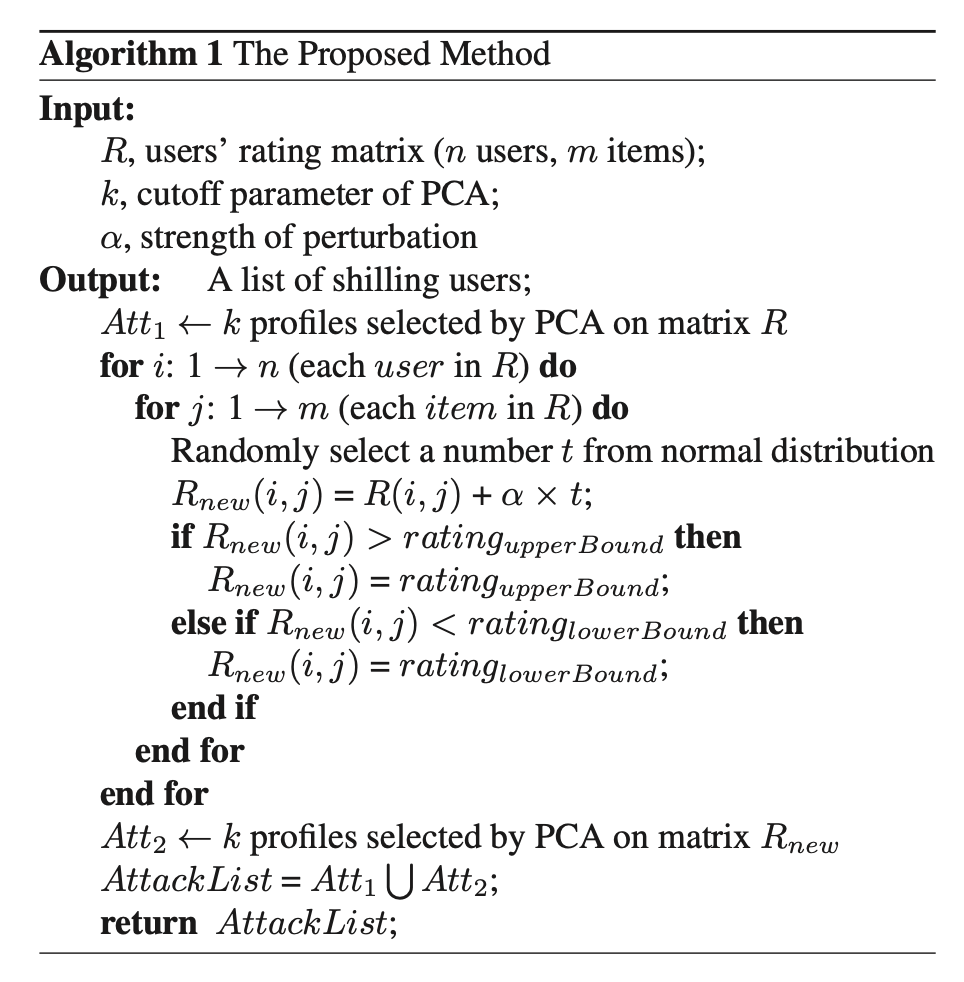
</div>

In [6]:
# R, users’ rating matrix (n users, m items);
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
999227,6040,1091,1,956716541
999228,6040,1094,5,956704887
999229,6040,562,5,956704746
999230,6040,1096,4,956715648


In [379]:
from sklearn.metrics.pairwise import cosine_similarity

# user similarity on replacing NAN by item(movie) avg
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )
similarity_with_movie = pd.DataFrame(cosine,index=final_movie.index)
# similarity_with_movie.columns=final_movie.columns
similarity_with_movie.head()

,0,1,2,3,4,5,6,7,8,9,...,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.986526,0.986872,0.989269,0.988333,0.986299,0.988335,0.990225,0.989487,0.987330,...,0.989696,0.990514,0.989154,0.988985,0.990410,0.986119,0.988863,0.990424,0.990503,0.988988
2,0.986526,0.000000,0.992626,0.994637,0.994572,0.990827,0.993951,0.995716,0.995490,0.992764,...,0.995058,0.995905,0.994874,0.994602,0.995584,0.991296,0.993362,0.995681,0.995799,0.993974
3,0.986872,0.992626,0.000000,0.995371,0.995233,0.991451,0.994348,0.996215,0.995785,0.993229,...,0.995524,0.996344,0.995314,0.995012,0.996120,0.991564,0.993805,0.996184,0.996262,0.994469
4,0.989269,0.994637,0.995371,0.000000,0.997276,0.993535,0.996383,0.998374,0.997881,0.994996,...,0.997815,0.998523,0.997595,0.997221,0.998298,0.993589,0.995950,0.998369,0.998456,0.996701
5,0.988333,0.994572,0.995233,0.997276,0.000000,0.993121,0.996148,0.997925,0.997641,0.994696,...,0.997236,0.998087,0.997150,0.996708,0.997876,0.993370,0.995618,0.997919,0.998006,0.996157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.986119,0.991296,0.991564,0.993589,0.993370,0.990242,0.992616,0.994578,0.994133,0.991744,...,0.993982,0.994837,0.993778,0.993434,0.994524,0.000000,0.992557,0.994578,0.994620,0.993048
3949,0.988863,0.993362,0.993805,0.995950,0.995618,0.993033,0.995133,0.997165,0.996698,0.993974,...,0.996798,0.997408,0.996403,0.995731,0.997306,0.992557,0.000000,0.997402,0.997519,0.995901
3950,0.990424,0.995681,0.996184,0.998369,0.997919,0.994734,0.997414,0.999379,0.998889,0.996164,...,0.998751,0.999482,0.998465,0.998100,0.999316,0.994578,0.997402,0.000000,0.999487,0.997780


In [82]:
dataframe = dataframe.notnull().astype('int')
dataframe.columns

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040],
           dtype='int64', name='UserID', length=6040)

In [84]:
df = pd.DataFrame({'docId': [1,2,3], 
               'sent': ['This is the first sentence','This is the second sentence', 'This is the third sentence']})
df

,docId,sent
0,1,This is the first sentence
1,2,This is the second sentence
2,3,This is the third sentence


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['sent'])
x.toarray()

array([[0.64612892, 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.64612892, 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.64612892, 0.38161415]])

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(dataframe[2])
x.toarray()

AttributeError: 'int' object has no attribute 'lower'

In [9]:
k=20
m=0.2
X=data_mat

In [10]:
pca = PCA(n_components=2)
principalComponents= pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.18632548 0.03515495]
[1543.14244766  670.2906123 ]


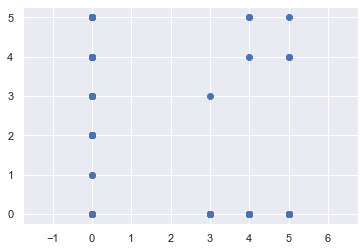

In [11]:
plt.scatter(data_mat[:, 0], data_mat[:, 1])
plt.axis('equal');

,UserID,MovieID,Rating,Timestamp
3431,26,234,3,978140049
6496,48,234,2,978147698
31750,216,234,1,976867580
56742,386,234,1,976303964
64817,438,234,4,976257242
...,...,...,...,...
977328,5896,234,1,957459632
977511,5897,234,1,957451156
982625,5944,234,1,957197567
985275,5955,234,4,957111071


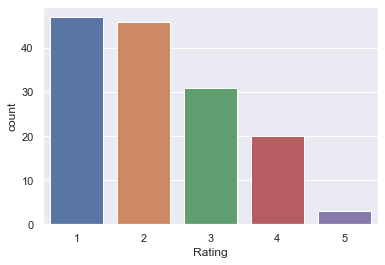

In [327]:
df=ratings_df[(ratings_df.MovieID == 234)]
ax=sns.countplot(x='Rating', data=df)
df

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math
import collections
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from scipy.stats import norm

### Import Data

In [4]:
df_ratings = pd.read_csv("Resources/ratings.csv", engine='python')
df_movies = pd.read_csv("Resources/movies.csv", engine='python')

### Select Target Movie

In [29]:
df=df_ratings
attack_size=100
target_movie_id=70
df_target_movie=df[(df.MovieID == target_movie_id)]
df_target_movie

,UserID,MovieID,Rating,Timestamp
1646,15,70,2,978212287
2519,20,70,4,978143369
2767,22,70,4,978136888
3061,23,70,4,978460739
7026,52,70,4,977947827
...,...,...,...,...
988213,5972,70,3,963615119
993821,6007,70,3,956791980
994257,6010,70,4,956860159
996390,6023,70,2,956751792


### Create Random Attack Data

In [30]:
def insert_random_attack(df, target_movie_id, attack_size=50, filler_size_percent=1, target_rate=5):
    timestamp=df[(df.MovieID == target_movie_id)].sort_values(by='Timestamp')['Timestamp'].median()
    mean_rate=df["Rating"].mean()
    #target rating
    last_user_id=df.loc[df['UserID'].idxmax()].UserID
    for i in range(attack_size):
        timestamp+=1000
        new_row = {'UserID':last_user_id+i,
                   'MovieID':target_movie_id,
                   'Rating':target_rate,
                   'Timestamp':timestamp}
        df = df.append(new_row, ignore_index=True)
        #random fill iteam rating
        df_random_movies=df_movies.sample(frac = 0.01)
        movie_list=df_random_movies.Id.unique().tolist()
        for movie_id in movie_list:
            if movie_id ==target_movie_id:
                continue
            new_row = {'UserID':last_user_id+i,
                       'MovieID':movie_id,
                       'Rating':int(mean_rate),
                       'Timestamp':timestamp}
            df = df.append(new_row, ignore_index=True)
    return df

In [31]:
new_df=insert_random_attack(df, target_movie_id, attack_size)
new_df

,UserID,MovieID,Rating,Timestamp
0,1.0,1193.0,5.0,978300760.0
1,1.0,661.0,3.0,978302109.0
2,1.0,914.0,3.0,978301968.0
3,1.0,3408.0,4.0,978300275.0
4,1.0,2355.0,5.0,978824291.0
...,...,...,...,...
1003227,6139.0,2676.0,3.0,974355975.5
1003228,6139.0,795.0,3.0,974355975.5
1003229,6139.0,2499.0,3.0,974355975.5
1003230,6139.0,3289.0,3.0,974355975.5


#### Rating Chart Before Attack

,UserID,MovieID,Rating,Timestamp
996701,6025.0,70.0,2.0,9.567307e+08
996390,6023.0,70.0,2.0,9.567518e+08
993821,6007.0,70.0,3.0,9.567920e+08
994257,6010.0,70.0,4.0,9.568602e+08
987279,5964.0,70.0,3.0,9.569960e+08
...,...,...,...,...
324077,1925.0,70.0,5.0,1.025962e+09
940577,5682.0,70.0,3.0,1.026680e+09
52662,349.0,70.0,2.0,1.027972e+09
460696,2847.0,70.0,3.0,1.028959e+09


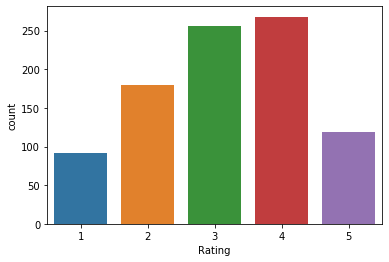

In [144]:
sns.countplot(x='Rating', data=df_target_movie)
df_attacked_movie=new_df[(new_df.MovieID == target_movie_id)].sort_values(by='Timestamp')
df_target_movie['Rating'].mean()
df_attacked_movie

#### Rating Chart After Attack

3.3382642998027614

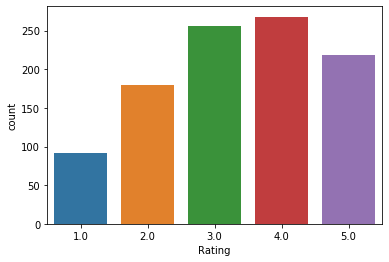

In [145]:
sns.countplot(x='Rating', data=df_attacked_movie)
df_attacked_movie['Rating'].mean()

# Sample Entropy
The measure we use to capture the degree of dispersal or concentration of a rating distribution is the sample entropy. the formula is:

In [146]:
def sample_entropy(rate_list):
    """Calculates the sample entropy of a time_series."""
    S=len(rate_list)
    rate_set=set(rate_list)
    HX=0
    for i in rate_set:
        ni=rate_list.count(i)
        HX+=(ni/S)*(math.log(ni/S,2))
    return -HX

In [147]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [148]:
def get_optimal_chunk_size(n):
    return int((2+math.sqrt(7))/6*n)

In [149]:
chunk_size=get_optimal_chunk_size(attack_size)
chunk_size=20
print("chunk_size: ",chunk_size)

chunk_size:  20


In [150]:
def get_sample_entropy_list(df, chunk_size=5):
    sample_entropy_list=[]
    index_list=list(chunks(range(0, len(df)+1), chunk_size))
    for i in index_list:
        chuck=df[i[0]:i[-1]]
        rate_list=chuck['Rating'].tolist()
        HX=sample_entropy(rate_list)
        sample_entropy_list.append(HX)
    return sample_entropy_list
sample_entropy_list=get_sample_entropy_list(df_attacked_movie, chunk_size=chunk_size)
sample_entropy_list

[2.2339979078388277,
 2.268472751631122,
 2.01821551467515,
 2.268472751631122,
 1.6135197342325187,
 1.7863012011716395,
 1.9688238866642984,
 2.268472751631122,
 2.1492799881316267,
 2.16100727900131,
 1.899022751175655,
 2.037401197654112,
 2.1492799881316267,
 1.9956123808398374,
 2.2148122248598656,
 1.9440097497163569,
 2.2148122248598656,
 2.01821551467515,
 2.0182155146751497,
 2.149279988131627,
 2.1868085945630504,
 2.2339979078388272,
 2.0182155146751497,
 0.2974722489192897,
 0.2974722489192897,
 -0.0,
 0.2974722489192897,
 0.2974722489192897,
 1.9440097497163569,
 2.01821551467515,
 1.8710191208788403,
 2.0762893592941096,
 2.1545360655058308,
 2.268472751631122,
 2.313459750171824,
 2.214812224859865,
 2.01821551467515,
 2.10209067485585,
 2.0890038287775923,
 1.6393210497942587,
 2.2492870686521598,
 2.2339979078388272,
 2.0182155146751497,
 1.7399546474223628,
 2.0042859090703917,
 1.7798299876761599,
 1.8474201200521745,
 2.1545360655058308,
 1.81294527625988,
 1.76270

Text(0.5, 0, 'window index')

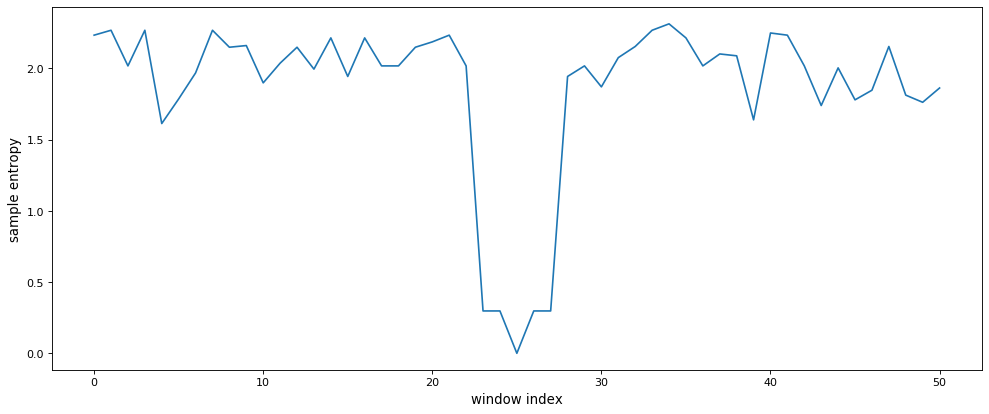

In [151]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(sample_entropy_list)),sample_entropy_list)
plt.ylabel('sample entropy', fontsize=12)
plt.xlabel('window index', fontsize=12)

In [152]:
def sample_average(rate_list):
    """Calculates the sample average of a time_series."""
    rate_dict = dict(collections.Counter(rate_list))
    S=sum(rate_dict.values())
    rate_multiple_repetitions=sum(p*c for p,c in rate_dict.items())
    return rate_multiple_repetitions/S

In [153]:
def get_sample_average_list(df, chunk_size=5):
    sample_entropy_list=[]
    index_list=list(chunks(range(0, len(df)+1), chunk_size))
    for i in index_list:
        chuck=df[i[0]:i[-1]]
        rate_list=chuck['Rating'].tolist()
        MX=sample_average(rate_list)
        sample_entropy_list.append(MX)
    return sample_entropy_list

In [154]:
sample_average_list=get_sample_average_list(df_attacked_movie, chunk_size=chunk_size)
sample_average_list

[3.0,
 3.210526315789474,
 2.789473684210526,
 2.8421052631578947,
 3.6842105263157894,
 3.0,
 3.3157894736842106,
 3.3157894736842106,
 3.3684210526315788,
 3.3684210526315788,
 3.263157894736842,
 3.1052631578947367,
 3.3684210526315788,
 3.526315789473684,
 3.1578947368421053,
 3.4210526315789473,
 3.0526315789473686,
 2.6315789473684212,
 3.210526315789474,
 3.4210526315789473,
 3.263157894736842,
 3.1052631578947367,
 3.3684210526315788,
 4.894736842105263,
 4.842105263157895,
 5.0,
 4.7894736842105265,
 4.947368421052632,
 3.6842105263157894,
 3.0,
 3.1052631578947367,
 3.1578947368421053,
 3.0,
 3.1052631578947367,
 3.1052631578947367,
 3.0,
 2.9473684210526314,
 3.0,
 2.8947368421052633,
 2.6315789473684212,
 3.1578947368421053,
 2.8947368421052633,
 3.3684210526315788,
 3.1052631578947367,
 3.6842105263157894,
 3.4210526315789473,
 3.0526315789473686,
 3.3157894736842106,
 3.6315789473684212,
 3.0526315789473686,
 3.0714285714285716]

Text(0.5, 0, 'window index')

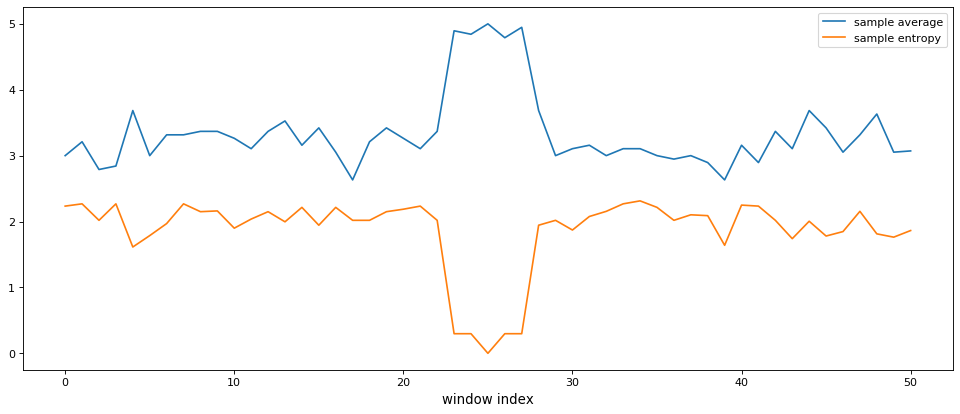

In [155]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(sample_average_list)),sample_average_list)
plt.plot(range(len(sample_entropy_list)),sample_entropy_list)
plt.legend(["sample average", "sample entropy"])
plt.xlabel('window index', fontsize=12)

In [162]:
def zscore_entropy_plot(chunk_size):
    sample_entropy_list=get_sample_entropy_list(df_attacked_movie, chunk_size=chunk_size)
    zsocre_sample_entropy_list=stats.zscore(sample_entropy_list)
    figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(range(len(zsocre_sample_entropy_list)),zsocre_sample_entropy_list)
    plt.legend(["sample entropy"])
    plt.xlabel('window index', fontsize=12)
    plt.ylabel('z-score', fontsize=12)

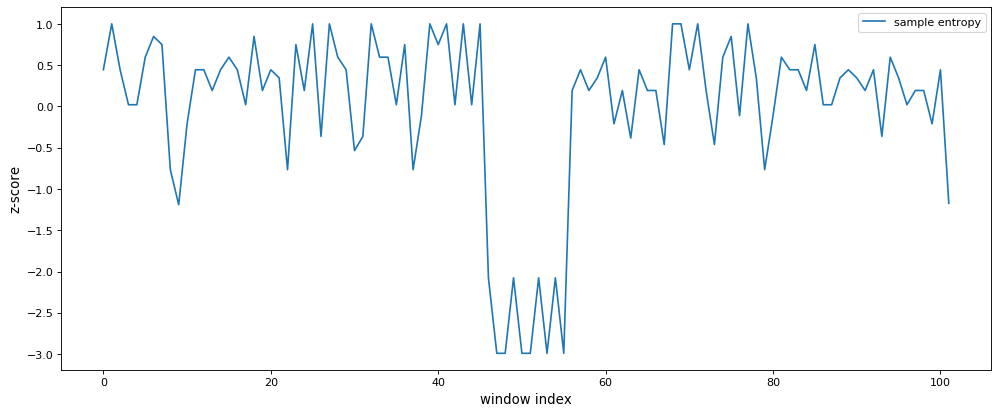

In [163]:
zscore_entropy_plot(10)

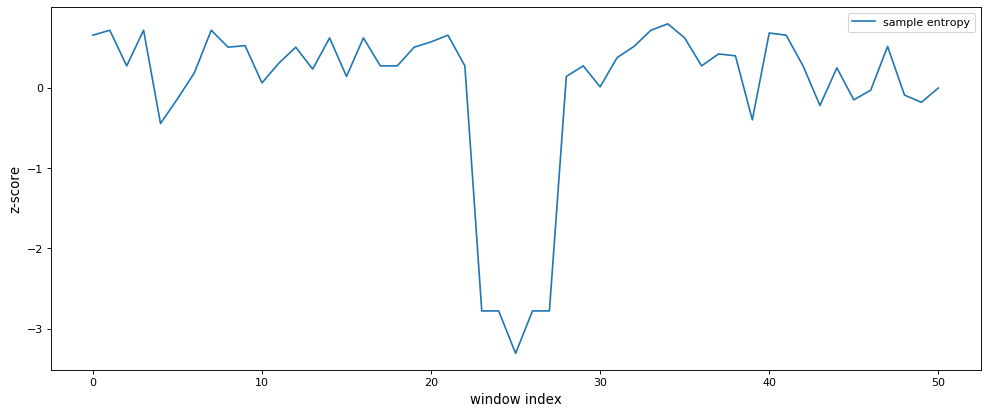

In [164]:
zscore_entropy_plot(20)

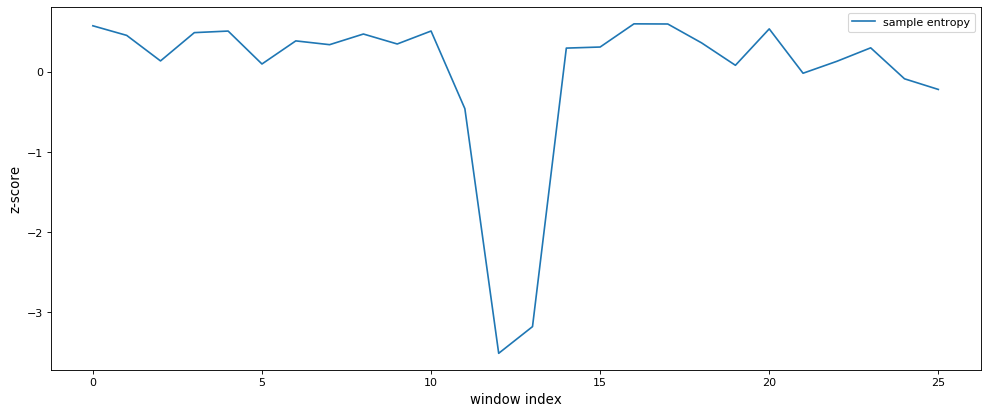

In [165]:
zscore_entropy_plot(40)

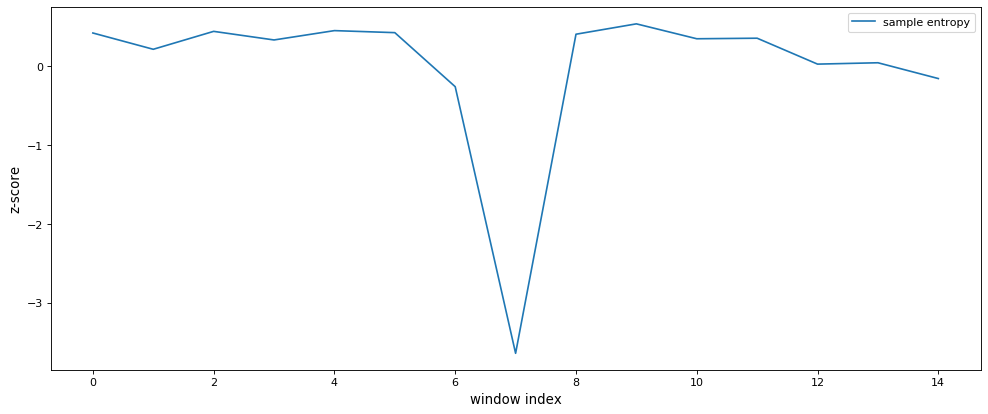

In [166]:
zscore_entropy_plot(70)

In [167]:
def optimum_chunk_size():
    chunk_size=20
    while True:
        sample_entropy_list=get_sample_entropy_list(df_attacked_movie, chunk_size=chunk_size)
        zsocre_sample_entropy_list=stats.zscore(sample_entropy_list)
        peaks = [i for i in zsocre_sample_entropy_list if abs(i) >= 2]
        if len(peaks)<=1:
            break
        numbers_of_attacks=len(peaks)*chunk_size
        chunk_size=get_optimal_chunk_size(numbers_of_attacks)
    return chunk_size
optimum_chunk_size()

77

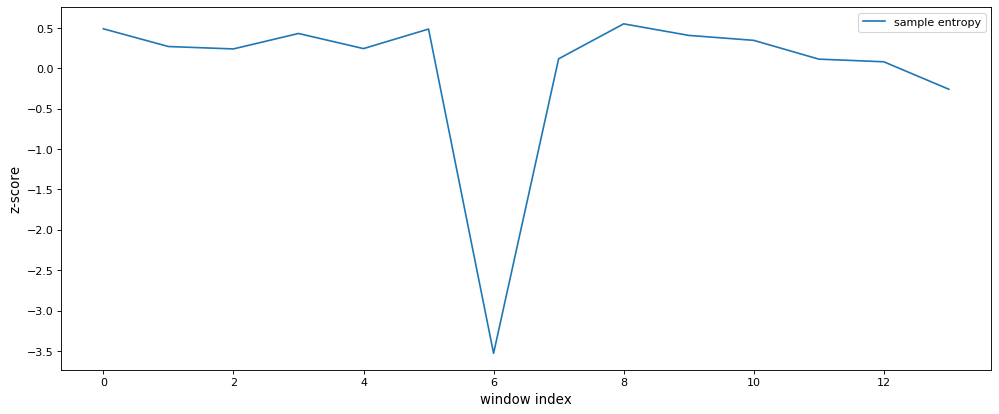

In [168]:
zscore_entropy_plot(77)

## An Obfuscated Attack Detection Approach for Collaborative Recommender Systems

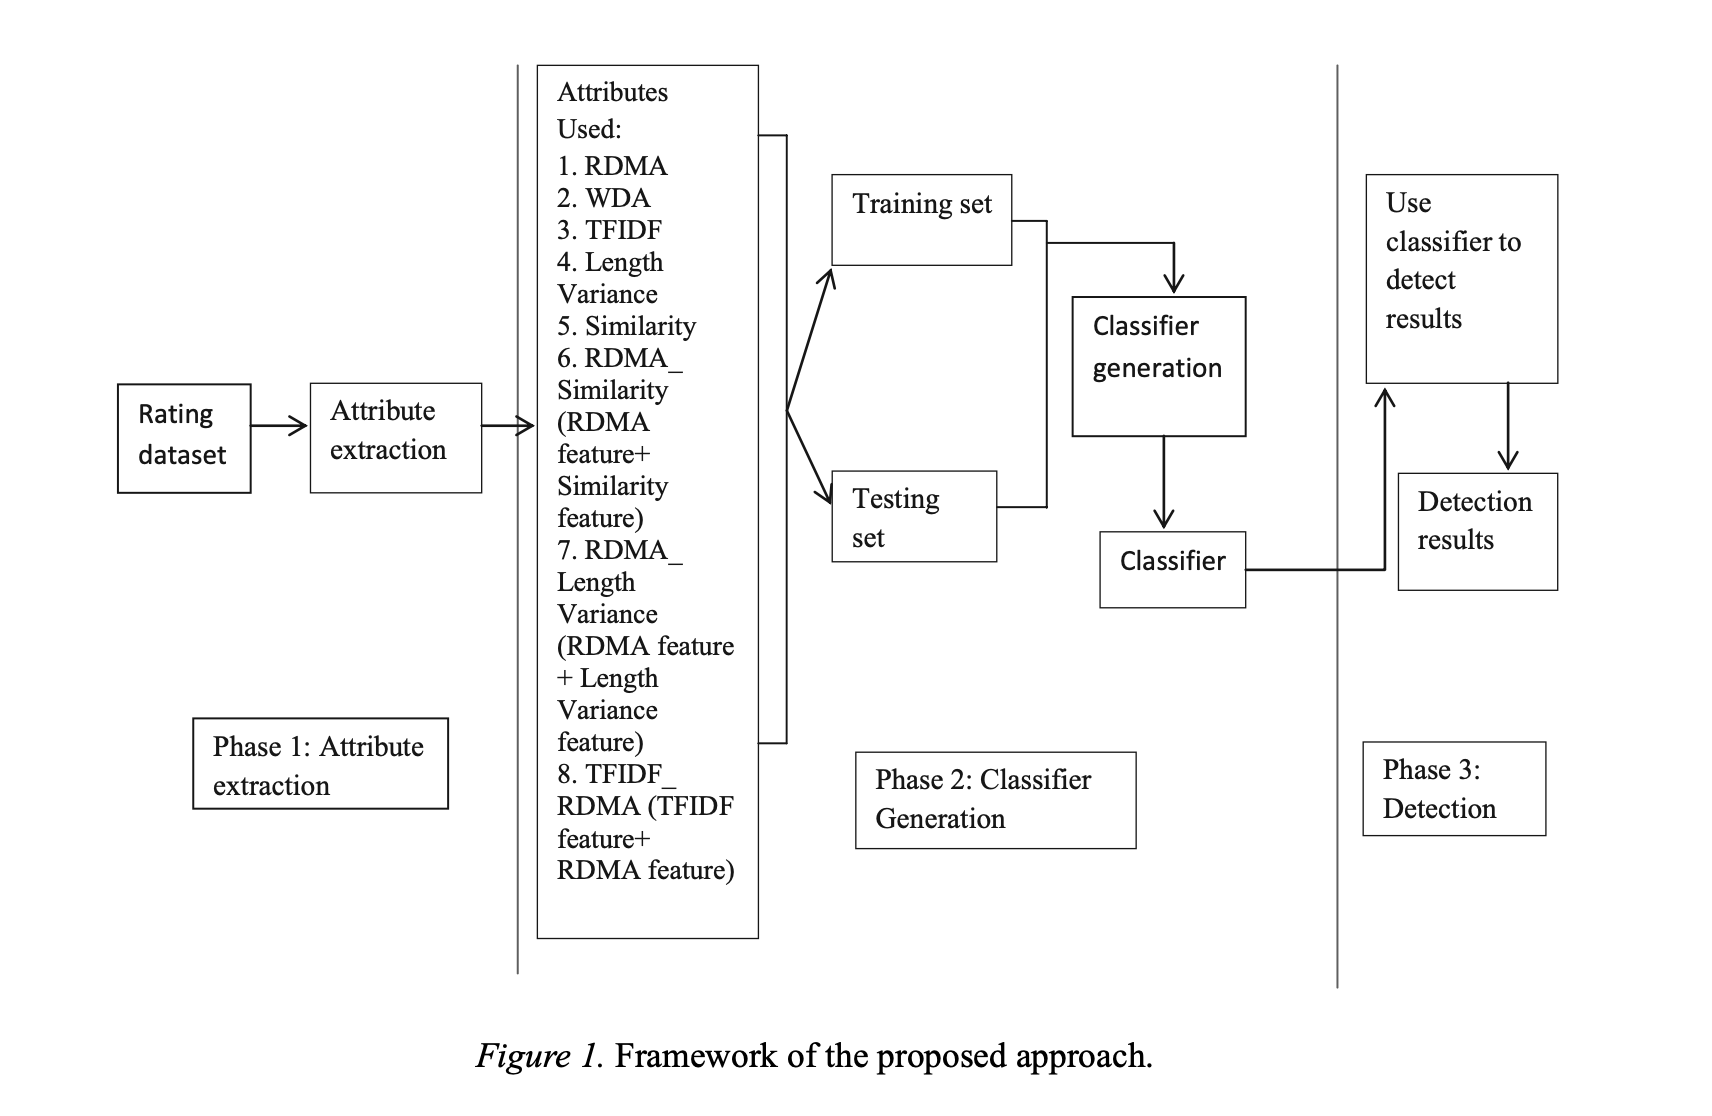

In [53]:
df_movie_mean = pd.DataFrame()
df=df_ratings
new_df=insert_random_attack(df, target_movie_id, attack_size)
df_movie_mean['MovieID']=new_df.MovieID.unique()

In [73]:
last_real_index=df_ratings.loc[df_ratings['UserID'].idxmax()].UserID
last_real_index

6040

In [55]:
movie_mean_list=[]
number_of_rates=[]
for index, row in df_movie_mean.iterrows():
    movie_id=row['MovieID']
    df=new_df[new_df.MovieID==movie_id]
    mean=df["Rating"].mean()
    movie_mean_list.append(mean)
    number_of_rates.append(df["Rating"].count())
df_movie_mean['RatingMean']=movie_mean_list
df_movie_mean['RatingCount']=number_of_rates
df_movie_mean

,MovieID,RatingMean,RatingCount
0,1193.0,4.390598,1723
1,661.0,3.463878,526
2,914.0,4.154331,635
3,3408.0,3.862805,1312
4,2355.0,3.853616,1701
...,...,...,...
3814,1706.0,3.000000,1
3815,770.0,3.000000,1
3816,1141.0,3.000000,1
3817,812.0,3.000000,1


In [77]:
df_attributes = pd.DataFrame()
user_ids=new_df.UserID.unique()
df_attributes['UserID']=user_ids
df_attributes['isAttack']=0
df_attributes.loc[df_attributes['UserID'] > last_real_index, 'isAttack'] = 1
df_attributes=df_attributes[-200:]
df_attributes

,UserID,isAttack
5939,5940.0,0
5940,5941.0,0
5941,5942.0,0
5942,5943.0,0
5943,5944.0,0
...,...,...
6134,6135.0,1
6135,6136.0,1
6136,6137.0,1
6137,6138.0,1


In [78]:
def calculate_RDMA_x(df_user_x_rates):
    numerator=0
    for index, row in df_user_x_rates.iterrows():
        movie_row=df_movie_mean[df_movie_mean.MovieID == row['MovieID']]
        Rxi=movie_row.iloc[0]['RatingCount']
        ri_mean=movie_row.iloc[0]['RatingMean']
        rxi=row['Rating']
        sigma_numerator=abs(rxi-ri_mean)/Rxi
        numerator+=sigma_numerator
    Nx=len(df_attributes)
    RDMAx=numerator/Nx
    return RDMAx

In [79]:
RDMAx_list=[]
for index, row in df_attributes.iterrows():
    user_x_id=row['UserID']
    df_user_x_rates=new_df[new_df.UserID==user_x_id]
    RDMAx=calculate_RDMA_x(df_user_x_rates)
    RDMAx_list.append(RDMAx)

In [80]:
df_attributes['RDMA']=RDMAx_list
df_attributes

,UserID,isAttack,RDMA
5939,5940.0,0,0.000290
5940,5941.0,0,0.000702
5941,5942.0,0,0.001053
5942,5943.0,0,0.000938
5943,5944.0,0,0.007116
...,...,...,...
6134,6135.0,1,0.003056
6135,6136.0,1,0.002766
6136,6137.0,1,0.005780
6137,6138.0,1,0.001994


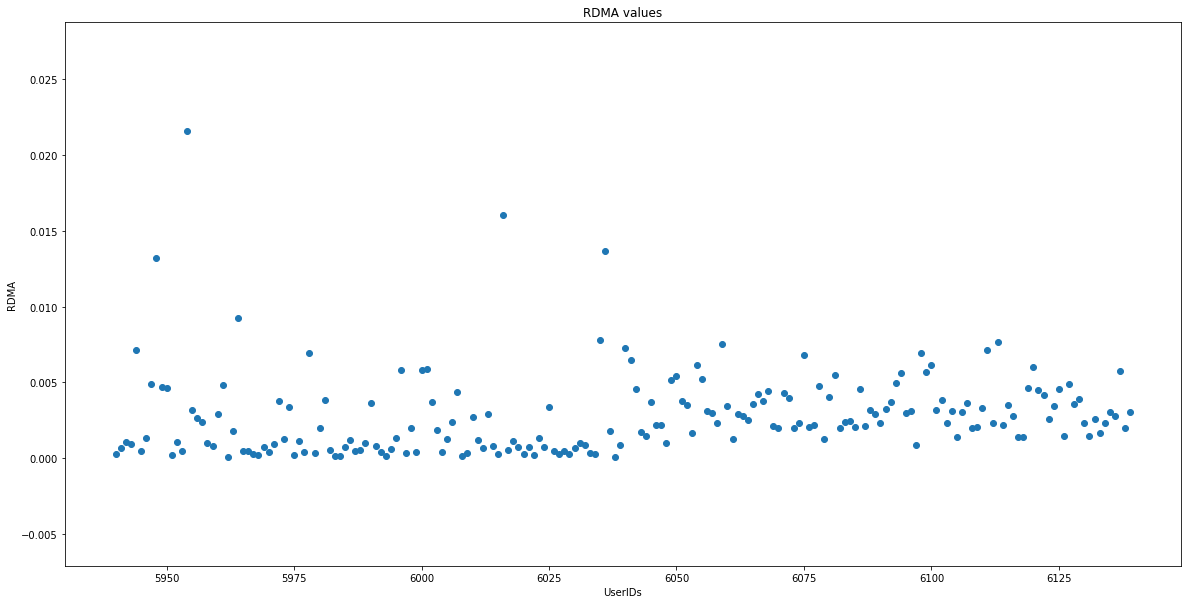

In [81]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(20,10))
plt.scatter(df_attributes['UserID'],df_attributes['RDMA'])
plt.title('RDMA values')
plt.xlabel('UserIDs')
plt.ylabel('RDMA')
plt.show()

In [82]:
final = pd.pivot_table(new_df,values='Rating',index='UserID',columns='MovieID')
final.head()

MovieID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,3943.0,3944.0,3945.0,3946.0,3947.0,3948.0,3949.0,3950.0,3951.0,3952.0
UserID,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Replacing NaN by Movie Average
# final_movie = final.fillna(final.mean(axis=0))
# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
final_movie = final.fillna(0)

In [84]:
# user similarity on replacing NAN by zero
        pearson = np.corrcoef(final_movie)
np.fill_diagonal(pearson, 1)
similarity_with_movie = pd.DataFrame(pearson,index=final_movie.index)
similarity_with_movie.columns=final_movie.index
similarity_with_movie.head()

UserID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6130.0,6131.0,6132.0,6133.0,6134.0,6135.0,6136.0,6137.0,6138.0,6139.0
UserID,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,0.077486,0.108993,0.125262,0.067242,0.166312,0.049882,0.119526,0.211453,0.231847,...,-0.011984,0.028572,-0.011984,0.008294,0.013364,-0.011984,-0.011984,-0.011984,0.013364,0.008294
2.0,0.077486,1.000000,0.134551,0.161384,0.079434,0.079140,0.295871,0.176201,0.166127,0.182706,...,-0.000364,-0.003983,-0.007602,0.014111,-0.014839,-0.018458,-0.003983,-0.007602,-0.018458,-0.003983
3.0,0.108993,0.134551,1.000000,0.144446,0.040059,0.060567,0.129701,0.058218,0.110368,0.188965,...,-0.011547,0.015698,-0.011547,0.010249,-0.011547,-0.011547,-0.011547,-0.011547,0.010249,0.015698
4.0,0.125262,0.161384,0.144446,1.000000,0.030466,0.003980,0.124766,0.089284,0.083268,0.103511,...,-0.007380,-0.007380,-0.007380,-0.007380,-0.007380,-0.007380,-0.007380,-0.007380,0.024122,0.031997
5.0,0.067242,0.079434,0.040059,0.030466,1.000000,0.019484,0.110208,0.188622,0.234969,0.052907,...,0.018162,-0.022454,0.008008,0.008008,-0.005531,0.001239,0.011392,0.018162,-0.015684,0.035085


In [85]:
# user similarity on replacing NAN by user avg
b = np.corrcoef(final_user)
np.fill_diagonal(b, 0)
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

UserID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,6130.0,6131.0,6132.0,6133.0,6134.0,6135.0,6136.0,6137.0,6138.0,6139.0
UserID,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.032665,-0.032267,0.016359,-0.016774,0.045229,0.014314,0.013465,0.061905,-0.004469,...,1.187425e-23,1.945648e-03,1.191741e-23,9.728241e-04,-4.183144e-03,1.187426e-23,1.195949e-23,1.196035e-23,-4.183144e-03,0.000973
2.0,0.032665,0.000000,0.023592,-0.016699,-0.032420,-0.019154,0.062835,-0.002045,0.060978,-0.004654,...,-2.875375e-03,-6.408969e-04,1.593582e-03,-3.516272e-03,6.062538e-03,-5.155582e-24,-6.408969e-04,1.593582e-03,-5.155199e-24,-0.000641
3.0,-0.032267,0.023592,0.000000,0.042521,-0.031153,-0.010965,0.057895,-0.040328,-0.021620,0.003036,...,1.119866e-23,-3.991543e-03,1.123856e-23,-3.563878e-04,1.127887e-23,1.119873e-23,1.127887e-23,1.127868e-23,-3.563878e-04,-0.003992
4.0,0.016359,-0.016699,0.042521,0.000000,-0.002730,0.032028,-0.031510,0.031002,0.021538,-0.038158,...,-1.991069e-23,-1.998093e-23,-1.998100e-23,-1.983917e-23,-2.005263e-23,-1.991045e-23,-2.005259e-23,-2.005240e-23,1.000410e-03,-0.004252
5.0,-0.016774,-0.032420,-0.031153,-0.002730,0.000000,-0.045909,0.009393,0.045783,0.015280,-0.004929,...,-4.077864e-03,-2.555687e-25,-4.311114e-03,6.997518e-04,2.059040e-03,-1.126037e-03,-8.927868e-04,-4.077864e-03,1.825789e-03,-0.002019


In [86]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [87]:
# top 20 neighbours for each user
sim_user_20_m = find_n_neighbours(similarity_with_movie,20)
sim_user_20_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
UserID,,,,,,,,,,,,,,,,,,,,
1.0,1.0,5343.0,5190.0,1481.0,1283.0,5705.0,5762.0,1359.0,1476.0,541.0,1858.0,681.0,1850.0,2177.0,4718.0,634.0,96.0,5887.0,2566.0,2766.0
2.0,2.0,3108.0,95.0,4601.0,2814.0,3995.0,3361.0,2303.0,300.0,810.0,2500.0,5169.0,558.0,2792.0,4786.0,4388.0,2683.0,204.0,3553.0,3599.0
3.0,3.0,3000.0,479.0,5691.0,3500.0,311.0,4320.0,2262.0,2435.0,1904.0,5237.0,2923.0,4889.0,803.0,5264.0,685.0,2787.0,4060.0,3281.0,847.0
4.0,4.0,4143.0,1575.0,5876.0,562.0,87.0,5842.0,3666.0,5628.0,5237.0,2347.0,3461.0,1349.0,1578.0,4002.0,5994.0,756.0,526.0,3631.0,3535.0
5.0,5.0,1484.0,5452.0,3538.0,281.0,1407.0,5749.0,5826.0,5718.0,3240.0,5496.0,1636.0,2918.0,1255.0,225.0,4607.0,944.0,1104.0,2870.0,5047.0


In [88]:
similarity_df=similarity_with_movie
DegSim_list=[]
for index, row in df_attributes.iterrows():
    user_id=row['UserID']
    sim_users=sim_user_20_m.iloc[int(user_id)-1]
    k=len(sim_users)
    sum_similarity=0
    for sim_user_id in sim_users:
        sum_similarity+=similarity_df[user_id][sim_user_id]
    DegSim=sum_similarity/k
    DegSim_list.append(DegSim)

In [89]:
df_attributes['DegSim']=DegSim_list

Text(0, 0.5, 'DegSim')

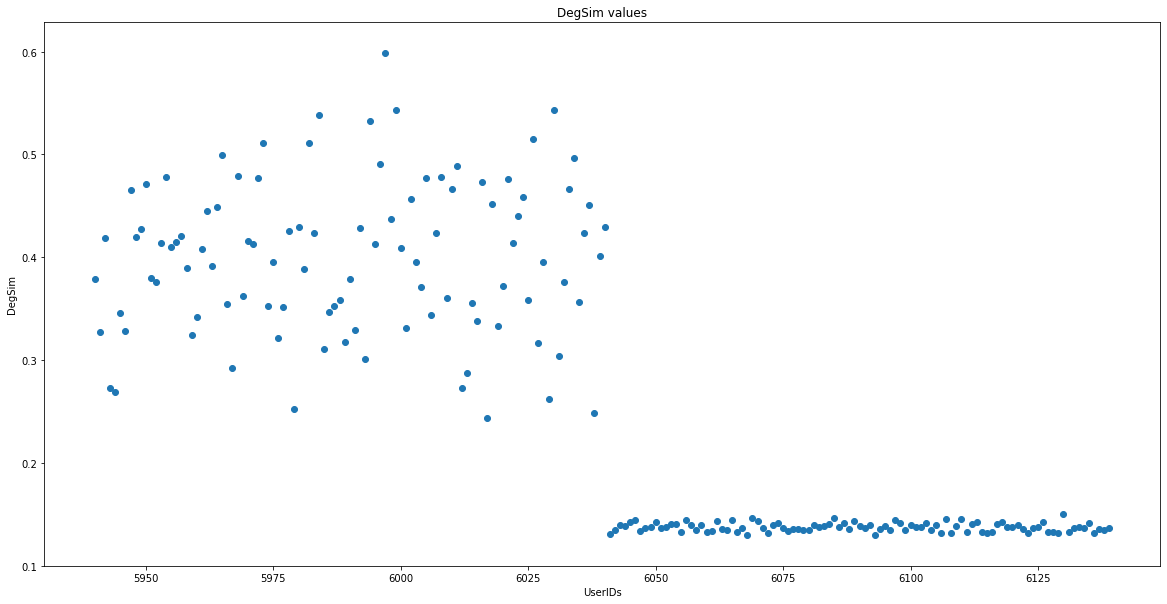

In [90]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(20,10))
plt.scatter(df_attributes['UserID'],df_attributes['DegSim'])
plt.title('DegSim values')
plt.xlabel('UserIDs')
plt.ylabel('DegSim')

In [122]:
df_attributes[:120]

,UserID,isAttack,RDMA,DegSim
5939,5940.0,0,0.000290,0.378752
5940,5941.0,0,0.000702,0.326986
5941,5942.0,0,0.001053,0.418604
5942,5943.0,0,0.000938,0.272873
5943,5944.0,0,0.007116,0.268424
...,...,...,...,...
6054,6055.0,1,0.005205,0.132961
6055,6056.0,1,0.003134,0.144622
6056,6057.0,1,0.002982,0.139773
6057,6058.0,1,0.002305,0.134758


In [144]:
features = df_attributes[['RDMA']].values

In [145]:
labels=df_attributes[['isAttack']].values

In [146]:
# Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [147]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(train, train_labels.ravel())
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

97.01

In [148]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train, train_labels.ravel())
Y_pred = neigh.predict(test)
neigh.score(train, train_labels)
acc_neigh = round(neigh.score(train, train_labels) * 100, 2)
acc_neigh

86.57